<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
# type your code here
# import 'Pandas' 
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score,roc_curve

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import StackingClassifier

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df_seed=pd.read_csv('seeds_dataset.csv')
df_seed.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.760000,13.380000,5.073000,3.155000,4.830000,0
1,12.130000,13.730000,5.394000,3.745000,5.220000,0
2,14.860000,14.670000,5.678000,3.258000,5.351000,0
3,15.690000,14.750000,5.527000,3.514000,5.046000,0
4,19.940000,16.920000,6.675000,3.763000,6.550000,1


In [3]:
df_seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              199 non-null    float64
 1   Perimeter         199 non-null    float64
 2   Kernel_len        199 non-null    float64
 3   Kernel_width      199 non-null    float64
 4   Kernelgroove_len  199 non-null    float64
 5   Type              199 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


In [4]:
df_seed.isnull().sum()

Area                0
Perimeter           0
Kernel_len          0
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

In [5]:
df_seed.shape

(199, 6)

**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Consider the train-test split in the ratio 70:30 with random state = 1.

In [6]:
# type your code here
x=df_seed.drop('Type',axis=1)
y=df_seed.Type
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
dt=DecisionTreeClassifier()

In [8]:
model = dt.fit(x_train,y_train)
ypred = model.predict(x_test)
print('accuracy of the model is',round(accuracy_score(y_test,ypred),2))

accuracy of the model is 0.92


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot a decision tree for the model in the previous question and identify the seed type of the first observation in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

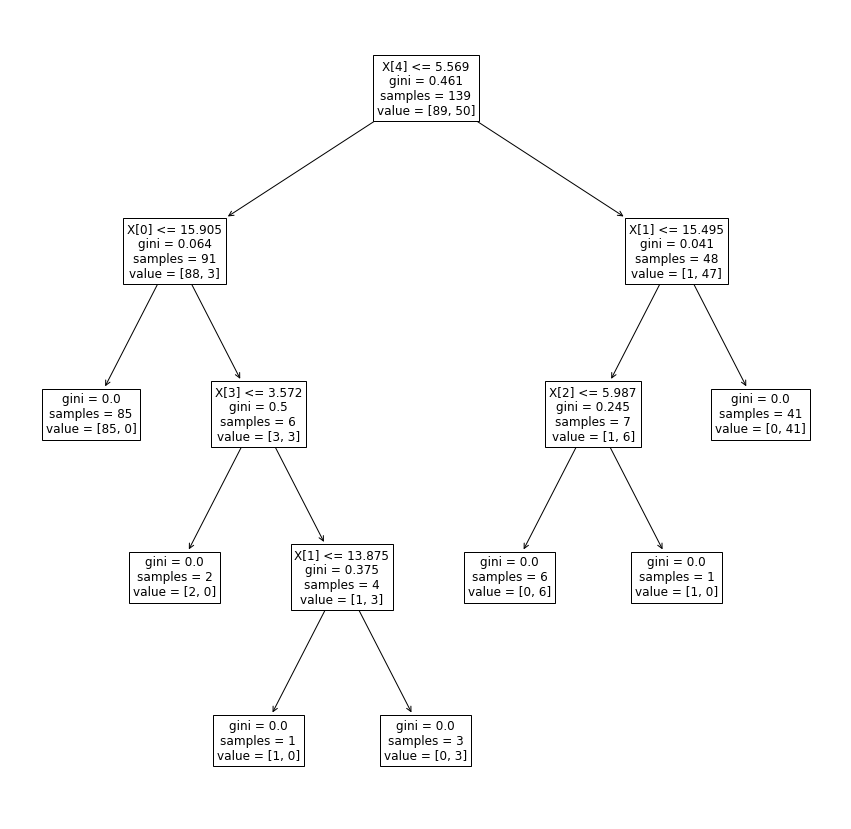

In [9]:
# type your code here
plt.rcParams['figure.figsize']=(15,15)
x=df_seed.drop('Type',axis=1)
y=df_seed.Type
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)
ypred = model.predict(x_test)
tree.plot_tree(model,fontsize=12)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Select the optimal number for decision trees from the given list of values to build a random forest using entropy criterion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

no_of_trees = [6, 8, 10, 12, 14, 16]

In [ ]:
# type your code here
params={'max_depth':[6,8,10,12,14,16],
       'min_samples_split': [2,4,6,8,10,12,14],
          'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
          'criterion': ['entropy']}

rf=RandomForestClassifier()
gd=GridSearchCV(rf,param_grid=params,scoring='f1_weighted',cv=5)
model=gd.fit(x_train,y_train)
model.best_params_

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the most important variable in the random forest build with the optimal number of trees obtained in Q3
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
rf = RandomForestClassifier(criterion= 'entropy',
   max_depth= 6,
    min_samples_split= 10)

model = rf.fit(x_train,y_train)
y_pred = model.predict(x_test)

res = pd.DataFrame({'Col':x.columns,'Importance':model.feature_importances_})
res.sort_values('Importance',ascending=False).head()

,Col,Importance
0,Area,0.342600
4,Kernelgroove_len,0.326799
1,Perimeter,0.207943
2,Kernel_len,0.104574
3,Kernel_width,0.018084


In [22]:
list(res.sort_values('Importance',ascending=False).head(1)['Col'])

['Area']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which is the best criterion to build a decision tree for the given dataset?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
# type your code here
rfc = RandomForestClassifier(**model.best_params_, random_state=4, oob_score=True)

rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10,
                       min_samples_split=10, oob_score=True, random_state=4)

In [ ]:
gsearch.best_params_

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a random forest containing ten trees and compute the precision and sensitivity of the model from the confusion matrix 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
rf=RandomForestClassifier()
params = {'max_depth': [ 10],
          'min_samples_split': [2,4,6,8,10,12,14],
          'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
          'criterion': ['entropy']}

gsearch = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=3)
gsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
             scoring='roc_auc')

In [30]:
rf=RandomForestClassifier()
modl=rf.fit(x_train,y_train)
y_train_pred=modl.predict(x_train)
y_train_prob=modl.predict_proba(x_train)[:,1]

In [36]:
print('Train - results')
cm = confusion_matrix(y_train,y_train_pred)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
specifity = TN/(TN+FP)
sensitivity = TP/(TP+FN)

print('specifity : ',round(specifity,2))
print('sensitivity :',round(sensitivity,2))


Train - results
specifity :  1.0
sensitivity : 1.0


In [38]:
y_test_pred=modl.predict(x_test)
y_test_prob=modl.predict_proba(x_test)[:,1]

In [39]:
print('Test- results')
cm = confusion_matrix(y_test,y_test_pred)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
specifity = TN/(TN+FP)
sensitivity = TP/(TP+FN)

print('specifity : ',round(specifity,2))
print('sensitivity :',round(sensitivity,2))


Test- results
specifity :  0.9
sensitivity : 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the optimal depth of the decision tree from the given list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth_values = [3, 5, 7, 9]

In [45]:
rf = RandomForestClassifier()
params = {'max_depth': [3, 5, 7, 9],
          'min_samples_split': [2,4,6,8,10,12,14],
          'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
          'criterion': ['entropy']}
gsearch = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=3, return_train_score=True)
gsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
             return_train_score=True, scoring='roc_auc')

In [48]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build and plot a decision tree with maximum 5 terminal nodes (use the entropy criterion)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# type your code here
DT=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5,max_leaf_nodes=5)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=5)

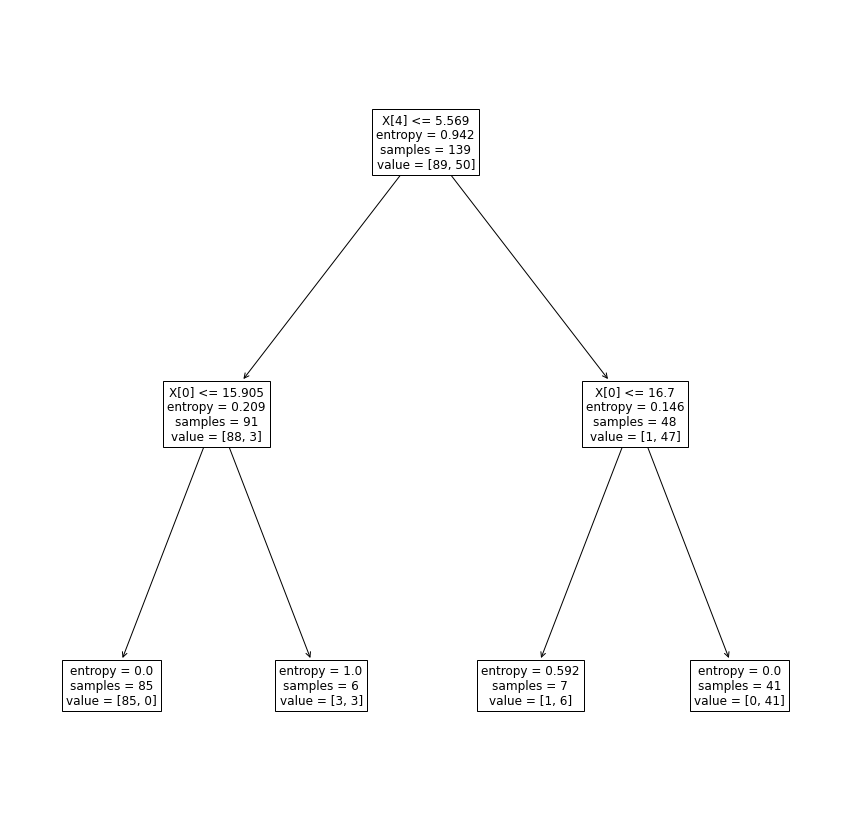

In [54]:
model = DT.fit(x_train,y_train)
ypred = model.predict(x_test)
tree.plot_tree(model,fontsize=12)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a random forest with entropy criterion such that each leaf node will contain at least three samples. Also calculate the f-1 score and accuracy of the model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
rf = RandomForestClassifier()
params = {'max_depth': [3, 5, 7, 9],
          'min_samples_split': [3],
          'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
          'criterion': ['entropy']}
gs = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=5,)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [3]},
             scoring='roc_auc')

In [56]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 3}

In [62]:
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_train_prob=model.predict_proba(x_train)[:,1]

In [63]:
#train-res
print('Train classification report')
print(classification_report(y_train,y_train_pred))

Train classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        50

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



In [ ]:
#f1-score and accuracy both are 100%

In [64]:
y_test_pred=model.predict(x_test)
y_test_prob=model.predict_proba(x_test)[:,1]

In [65]:
print('Test classification report')
print(classification_report(y_test,y_test_pred))

Test classification report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.88      1.00      0.93        21

    accuracy                           0.95        60
   macro avg       0.94      0.96      0.95        60
weighted avg       0.96      0.95      0.95        60



In [ ]:
#f1-score_0 is 96%,f1-score_1 93%  and the accuracy is 95%

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Plot a decision tree with the optimal criterion such that it will contain no more than 4 terminal nodes and each terminal node will contain at least 5 observations  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
# type your code
DT=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5,max_leaf_nodes=4)
DT.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4,
                       min_samples_leaf=5)

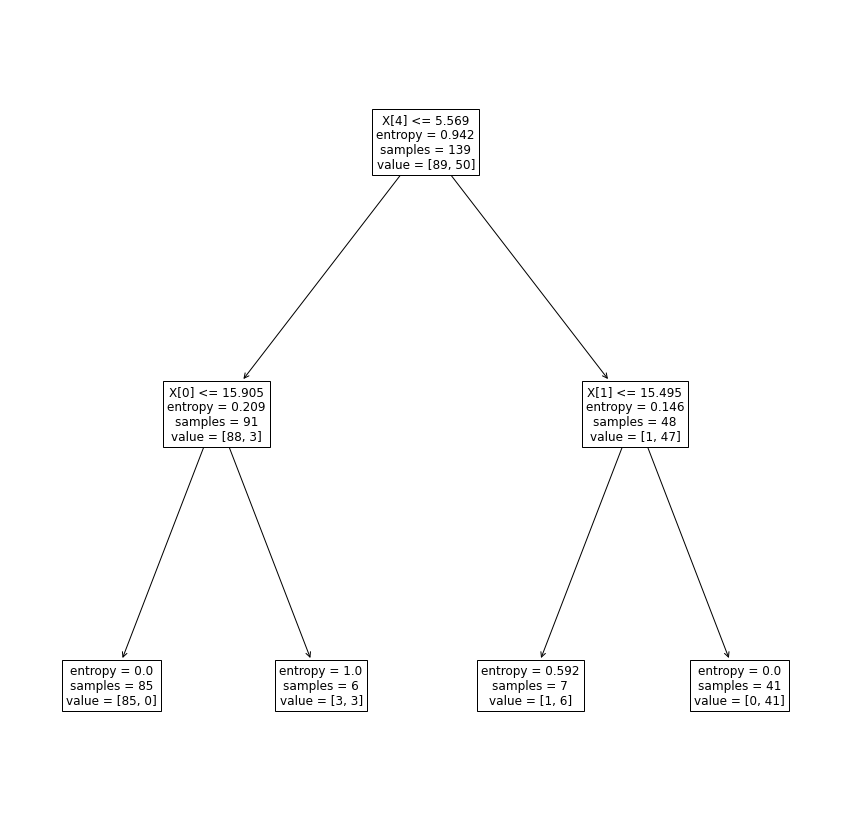

In [81]:
model = DT.fit(x_train,y_train)
ypred = model.predict(x_test)
tree.plot_tree(model,fontsize=12)
plt.show()